# Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd

# Question:1

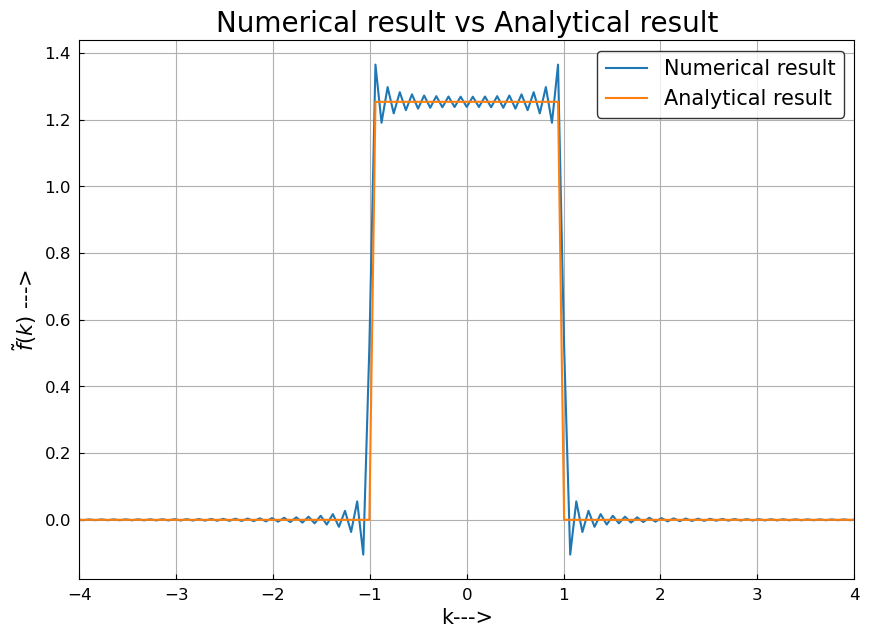

In [5]:
#Defining the sinc function
def sinc(x):
    if (x==0):
        return (1)
    else:
        return (np.sin(x))/x

#Defining function for analytical fourier transform
def exact(x):
    if (-1<=x<=1):
        return (np.sqrt((np.pi)/2))
    else:
        return (0)

#Setting the x-range, number of points and delta(x)
xi = -50
xf = 50
N = 10000
delx = (xf-xi)/(N-1)

#Array for values of sinc(x)
sincarr =[]
for i in range(N):
    sincarr.append(sinc(xi+ (i*delx)))

#Obtaining the dft
dft = np.fft.fft(sincarr, norm='ortho')                 #norm = 'ortho' gives us unitary transforms
k = ((2*(np.pi))/(delx))*(np.fft.fftfreq(N))            #obtaining dft sample frequencies

#2-dimensional array for dft data (k and f(k))
dftarr = []
for i in range(N):
    dftarr.append([k[i],dft[i]])

#Sorting the dft-array
dftarr.sort(key=lambda x:x[0])

#Getting the final fourier transform
kp,ft = [],[]
for l in range(N):
    ft.append((delx)*((N/(2*np.pi))**0.5)*(np.exp(-1j*xi*dftarr[l][0]))*(dftarr[l][1]))
    kp.append(dftarr[l][0])

#Generating data for analytical fourier transform
exact_ft=[]
for i in range(len(kp)):
    exact_ft.append(exact(kp[i]))


#Plotting the numerical vs analytical result
plt.plot(kp, ft, label='Numerical result')
plt.plot(kp,exact_ft, label='Analytical result')
plt.xlabel('k--->',rotation = 0, fontsize = 15 , labelpad = 4)  # Label for x-axis
plt.ylabel(r'$\tilde{f}(k)$ --->',rotation = 90, fontsize = 15 , labelpad = 4)  # Label for y-axis
plt.title('Numerical result vs Analytical result',fontsize = 20)  # Title of the plot
plt.xlim(-4,4)
plt.rcParams['figure.figsize'] = [10,7]
plt.tick_params(axis="y",direction="in", pad=6)
plt.tick_params(axis="x",direction="in", pad=6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)  # Enable grid
plt.legend(edgecolor = 'black', fontsize=15)  # Show legend
plt.show()  # Show the plot

# Question:3

/home/vidit/anaconda3/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/vidit/anaconda3/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


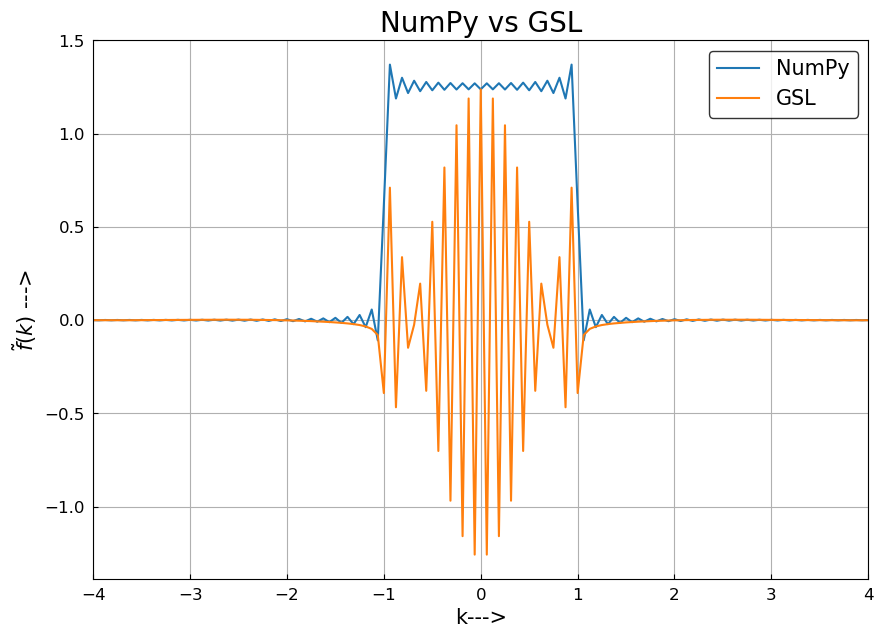

In [11]:
#Defining the sinc function
def sinc(x):
    if (x==0):
        return (1)
    else:
        return (np.sin(x))/x

#Defining function for analytical fourier transform
def exact(x):
    if (-1<=x<=1):
        return (np.sqrt((np.pi)/2))
    else:
        return (0)

#Setting the x-range, number of points and delta(x)
xi = -50
xf = 50
N = 200
delx = (xf-xi)/(N-1)

#Array for values of sinc(x)
sincarr =[]
for i in range(N):
    sincarr.append(sinc(xi+ (i*delx)))

#Obtaining the dft
dft = np.fft.fft(sincarr, norm='ortho')                 #norm = 'ortho' gives us unitary transforms
k = ((2*(np.pi))/(delx))*(np.fft.fftfreq(N))            #obtaining dft sample frequencies

#2-dimensional array for dft data (k and f(k))
dftarr = []
for i in range(N):
    dftarr.append([k[i],dft[i]])

#Sorting the dft-array
dftarr.sort(key=lambda x:x[0])

#Getting the final fourier transform
kp,ft = [],[]
for l in range(N):
    ft.append((delx)*((N/(2*np.pi))**0.5)*(np.exp(-1j*xi*dftarr[l][0]))*(dftarr[l][1]))
    kp.append(dftarr[l][0])

#Generating data for analytical fourier transform
exact_ft=[]
for i in range(len(kp)):
    exact_ft.append(exact(kp[i]))

#Defining k-array
k = np.array(kp)

#Importing data from csv file
dataq3 = pd.read_csv('ques3.csv',sep=",",header=None)

factor = (delx)*np.sqrt(N/(2*np.pi))*np.exp(-1j*k*i)             #Multiplicative factor
dataq3_2 = dataq3.to_numpy()
ft_C = dataq3_2[:,0]+1j*dataq3_2[:,1]
ft_C = factor*np.fft.fftshift(ft_C)/np.sqrt(N)

#Plotting the results
plt.plot(kp, ft, label='NumPy')
plt.plot(k,np.real(ft_C),label='GSL')
plt.xlabel('k--->',rotation = 0, fontsize = 15 , labelpad = 4)  # Label for x-axis
plt.ylabel(r'$\tilde{f}(k)$ --->',rotation = 90, fontsize = 15 , labelpad = 4)  # Label for y-axis
plt.title('NumPy vs GSL',fontsize = 20)  # Title of the plot
plt.xlim(-4,4)
plt.rcParams['figure.figsize'] = [10,7]
plt.tick_params(axis="y",direction="in", pad=6)
plt.tick_params(axis="x",direction="in", pad=6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)  # Enable grid
plt.legend(edgecolor = 'black', fontsize=15)  # Show legend
plt.show()  # Show the plot

# Question:5

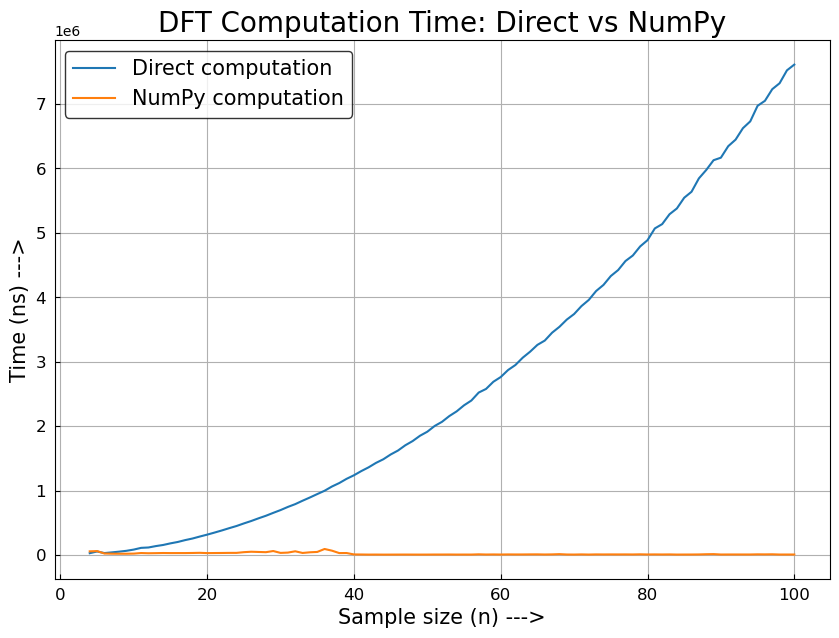

In [58]:
#Defining function for direct dft computation
def dftdirect(x,N):
        xt = []
        for i in range(N):
            s = 0
            for j in range(N):
                s = s + x[j]*np.exp((-1j*2*np.pi*i*j)/N)
            xt.append(s/(N)**0.5)
        return xt

direct_t = []                       #Time-array for direct dft computation
numpy_t = []                        #Time-array for numpy dft computation
n = []                              #Array for number of points
iter = 30                           #Number of iterations

#Loop for time-computation
for p in range(4,101):
    d_t = []
    n_t = []
    for l in range(iter):
        x = []                     #Array of numbers whose dft is to be computed
        for k in range(p):
            x.append(np.random.randint(0,10))
        N = len(x)
        
        t1 = time.time_ns()
        dft_ex = dftdirect(x,N)
        t2 = time.time_ns()
        dft_np = np.fft.fft(x,norm='ortho')
        t3 = time.time_ns()
        d_t.append(t2-t1)          #Time for direct calculation
        n_t.append(t3-t2)          #Time for numpy calculation
    direct_t.append(sum(d_t)/len(d_t))
    numpy_t.append(sum(n_t)/len(n_t))    
    n.append(p)

#Plotting the results
plt.plot(n,direct_t,label='Direct computation')
plt.plot(n,numpy_t,label='NumPy computation')
plt.xlabel('Sample size (n) --->',rotation = 0, fontsize = 15 , labelpad = 4)  # Label for x-axis
plt.ylabel('Time (ns) --->',rotation = 90, fontsize = 15 , labelpad = 4)  # Label for y-axis
plt.title('DFT Computation Time: Direct vs NumPy',fontsize = 20)  # Title of the plot
plt.rcParams['figure.figsize'] = [10,7]
plt.tick_params(axis="y",direction="in", pad=6)
plt.tick_params(axis="x",direction="in", pad=6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)  # Enable grid
plt.legend(edgecolor = 'black', fontsize=15)  # Show legend
plt.show()  # Show the plot

# Question:6

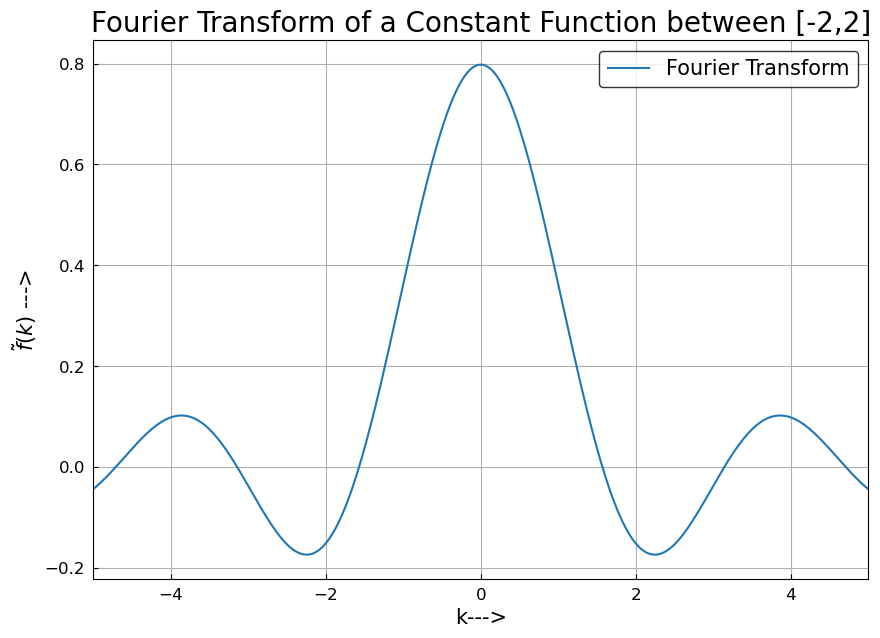

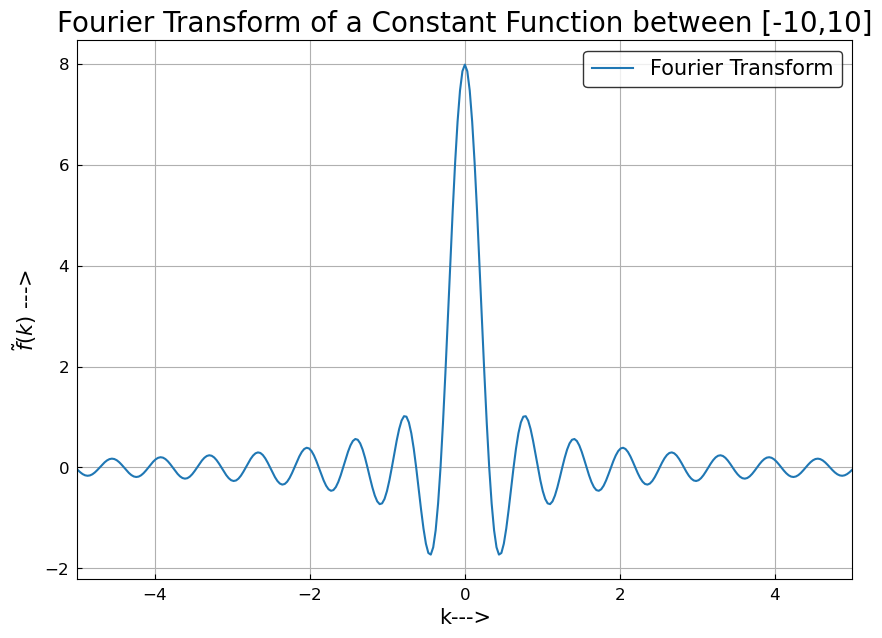

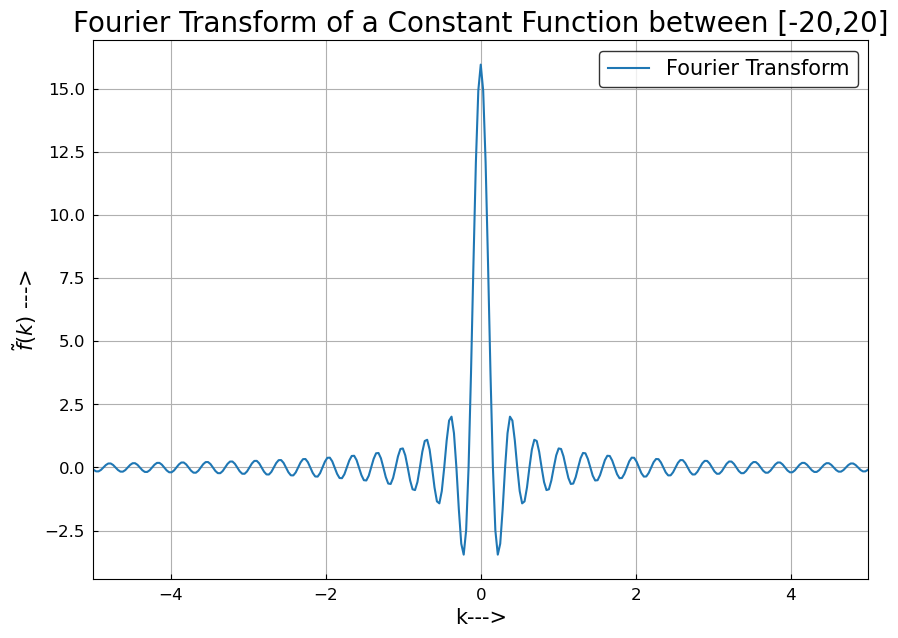

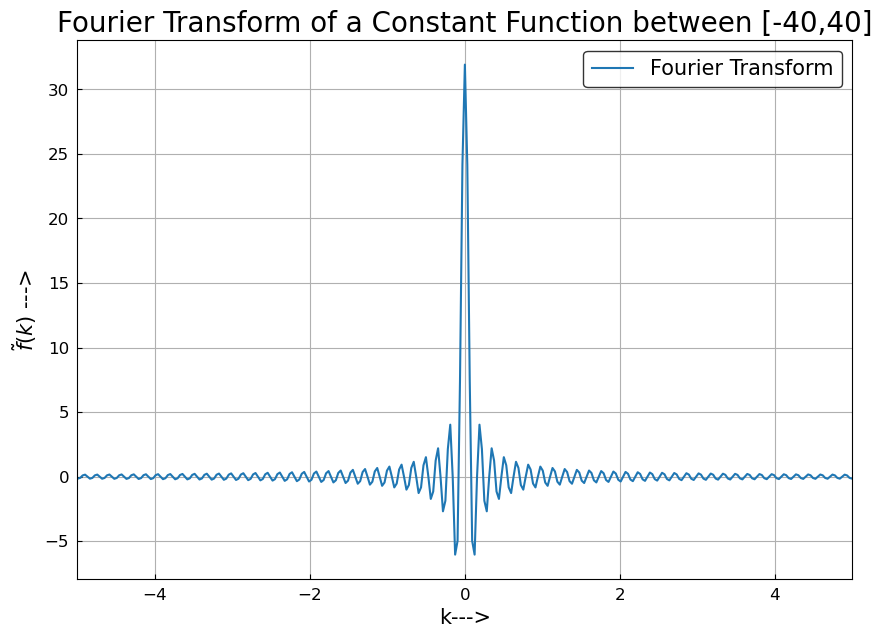

In [80]:
#Defining the constant function between [-2,2]
def const(x):
    if (x>2 or x<-0):
        return (0)
    else:
        return (1)

#Setting the x-range, number of points and delta(x)
xi = -100
xf = 100
N = 10000
delx = (xf-xi)/(N-1)

#Array for values of const(x)
constarr =[]
for i in range(N):
    constarr.append(const(xi+ (i*delx)))

#Obtaining the dft
dft = np.fft.fft(constarr, norm='ortho')                 #norm = 'ortho' gives us unitary transforms
k = ((2*(np.pi))/(delx))*(np.fft.fftfreq(N))             #obtaining dft sample frequencies

#2-dimensional array for dft data (k and f(k))
dftarr = []
for i in range(N):
    dftarr.append([k[i],dft[i]])

#Sorting the dft-array
dftarr.sort(key=lambda x:x[0])

#Getting the final fourier transform
kp,ft = [],[]
for l in range(N):
    ft.append((delx)*((N/(2*np.pi))**0.5)*(np.exp(-1j*xi*dftarr[l][0]))*(dftarr[l][1]))
    kp.append(dftarr[l][0])

#Plotting the result
plt.figure(0)
plt.plot(kp, ft, label='Fourier Transform')
plt.xlabel('k--->',rotation = 0, fontsize = 15 , labelpad = 4)  # Label for x-axis
plt.ylabel(r'$\tilde{f}(k)$ --->',rotation = 90, fontsize = 15 , labelpad = 4)  # Label for y-axis
plt.title('Fourier Transform of a Constant Function between [-2,2]',fontsize = 20)  # Title of the plot
plt.xlim(-5,5)
plt.rcParams['figure.figsize'] = [10,7]
plt.tick_params(axis="y",direction="in", pad=6)
plt.tick_params(axis="x",direction="in", pad=6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)  # Enable grid
plt.legend(edgecolor = 'black', fontsize=15)  # Show legend
plt.show()  # Show the plot



#Defining the constant function between [-10,10]
def const(x):
    if (x>10 or x<-10):
        return (0)
    else:
        return (1)

#Setting the x-range, number of points and delta(x)
xi = -100
xf = 100
N = 10000
delx = (xf-xi)/(N-1)

#Array for values of const(x)
constarr =[]
for i in range(N):
    constarr.append(const(xi+ (i*delx)))

#Obtaining the dft
dft = np.fft.fft(constarr, norm='ortho')                 #norm = 'ortho' gives us unitary transforms
k = ((2*(np.pi))/(delx))*(np.fft.fftfreq(N))             #obtaining dft sample frequencies

#2-dimensional array for dft data (k and f(k))
dftarr = []
for i in range(N):
    dftarr.append([k[i],dft[i]])

#Sorting the dft-array
dftarr.sort(key=lambda x:x[0])

#Getting the final fourier transform
kp,ft = [],[]
for l in range(N):
    ft.append((delx)*((N/(2*np.pi))**0.5)*(np.exp(-1j*xi*dftarr[l][0]))*(dftarr[l][1]))
    kp.append(dftarr[l][0])

#Plotting the result
plt.figure(1)
plt.plot(kp, ft, label='Fourier Transform')
plt.xlabel('k--->',rotation = 0, fontsize = 15 , labelpad = 4)  # Label for x-axis
plt.ylabel(r'$\tilde{f}(k)$ --->',rotation = 90, fontsize = 15 , labelpad = 4)  # Label for y-axis
plt.title('Fourier Transform of a Constant Function between [-10,10]',fontsize = 20)  # Title of the plot
plt.xlim(-5,5)
plt.rcParams['figure.figsize'] = [10,7]
plt.tick_params(axis="y",direction="in", pad=6)
plt.tick_params(axis="x",direction="in", pad=6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)  # Enable grid
plt.legend(edgecolor = 'black', fontsize=15)  # Show legend
plt.show()  # Show the plot



#Defining the constant function between [-20,20]
def const(x):
    if (x>20 or x<-20):
        return (0)
    else:
        return (1)

#Setting the x-range, number of points and delta(x)
xi = -100
xf = 100
N = 10000
delx = (xf-xi)/(N-1)

#Array for values of const(x)
constarr =[]
for i in range(N):
    constarr.append(const(xi+ (i*delx)))

#Obtaining the dft
dft = np.fft.fft(constarr, norm='ortho')                 #norm = 'ortho' gives us unitary transforms
k = ((2*(np.pi))/(delx))*(np.fft.fftfreq(N))             #obtaining dft sample frequencies

#2-dimensional array for dft data (k and f(k))
dftarr = []
for i in range(N):
    dftarr.append([k[i],dft[i]])

#Sorting the dft-array
dftarr.sort(key=lambda x:x[0])

#Getting the final fourier transform
kp,ft = [],[]
for l in range(N):
    ft.append((delx)*((N/(2*np.pi))**0.5)*(np.exp(-1j*xi*dftarr[l][0]))*(dftarr[l][1]))
    kp.append(dftarr[l][0])

#Plotting the result
plt.figure(2)
plt.plot(kp, ft, label='Fourier Transform')
plt.xlabel('k--->',rotation = 0, fontsize = 15 , labelpad = 4)  # Label for x-axis
plt.ylabel(r'$\tilde{f}(k)$ --->',rotation = 90, fontsize = 15 , labelpad = 4)  # Label for y-axis
plt.title('Fourier Transform of a Constant Function between [-20,20]',fontsize = 20)  # Title of the plot
plt.xlim(-5,5)
plt.rcParams['figure.figsize'] = [10,7]
plt.tick_params(axis="y",direction="in", pad=6)
plt.tick_params(axis="x",direction="in", pad=6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)  # Enable grid
plt.legend(edgecolor = 'black', fontsize=15)  # Show legend
plt.show()  # Show the plot



#Defining the constant function between [-40,40]
def const(x):
    if (x>40 or x<-40):
        return (0)
    else:
        return (1)

#Setting the x-range, number of points and delta(x)
xi = -100
xf = 100
N = 10000
delx = (xf-xi)/(N-1)

#Array for values of const(x)
constarr =[]
for i in range(N):
    constarr.append(const(xi+ (i*delx)))

#Obtaining the dft
dft = np.fft.fft(constarr, norm='ortho')                 #norm = 'ortho' gives us unitary transforms
k = ((2*(np.pi))/(delx))*(np.fft.fftfreq(N))             #obtaining dft sample frequencies

#2-dimensional array for dft data (k and f(k))
dftarr = []
for i in range(N):
    dftarr.append([k[i],dft[i]])

#Sorting the dft-array
dftarr.sort(key=lambda x:x[0])

#Getting the final fourier transform
kp,ft = [],[]
for l in range(N):
    ft.append((delx)*((N/(2*np.pi))**0.5)*(np.exp(-1j*xi*dftarr[l][0]))*(dftarr[l][1]))
    kp.append(dftarr[l][0])

#Plotting the result
plt.figure(3)
plt.plot(kp, ft, label='Fourier Transform')
plt.xlabel('k--->',rotation = 0, fontsize = 15 , labelpad = 4)  # Label for x-axis
plt.ylabel(r'$\tilde{f}(k)$ --->',rotation = 90, fontsize = 15 , labelpad = 4)  # Label for y-axis
plt.title('Fourier Transform of a Constant Function between [-40,40]',fontsize = 20)  # Title of the plot
plt.xlim(-5,5)
plt.rcParams['figure.figsize'] = [10,7]
plt.tick_params(axis="y",direction="in", pad=6)
plt.tick_params(axis="x",direction="in", pad=6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)  # Enable grid
plt.legend(edgecolor = 'black', fontsize=15)  # Show legend
plt.show()  # Show the plot

# Question:10

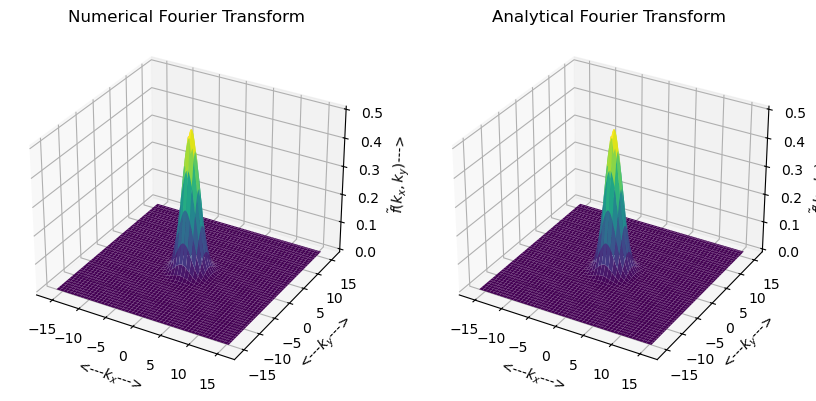

In [84]:
#Creating a 2-D square mesh of points
meshlim = 500
meshsize = 5001
delta = 2*meshlim/(meshsize-1)                                    #Spacing between two mesh-points
x = np.linspace(-meshlim, meshlim, meshsize)                      #Creating x-values
y = np.linspace(-meshlim, meshlim, meshsize)                      #Creating y-values
xg, yg = np.meshgrid(x, y)                                        #Creating the grid

#Exact values of the 2-D Gaussian function
zg = np.exp(-(xg**2 + yg**2))

#Computing the 2-D fourier transform
ftz = np.fft.fft2(zg,norm='ortho')                                #norm = 'ortho' ensures unitary transformation
ftz = np.fft.fftshift(ftz)                            
kx = (2*np.pi/(meshsize*delta))*np.arange(-(meshsize-1)/2,(meshsize-1)/2+1)              #dft sample frequencies 'kx'
ky = (2*np.pi/(meshsize*delta))*np.arange(-(meshsize-1)/2,(meshsize-1)/2+1)              #dft sample frequencies 'ky'
kxg, kyg = np.meshgrid(kx, ky)
ft_z = (delta**2)*(meshsize/(2*np.pi))*np.exp(-1j*(kxg*np.min(x)+kyg*np.min(y)))*ftz

#Analytical fourier transform values
kzg = 0.5*np.exp(-(kxg**2+kyg**2)/4)

#Plotting Numerical vs Analytical result
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(kxg, kyg, ft_z, cmap='viridis')
ax1.set_title('Numerical Fourier Transform')
ax1.set_xlabel(r'<---$k_x$--->')
ax1.set_ylabel(r'<---$k_y$--->')
ax1.set_zlabel(r'$\tilde{f}(k_x , k_y)$--->')
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(kxg, kyg, kzg , cmap='viridis')
ax2.set_title('Analytical Fourier Transform')
ax2.set_xlabel(r'<---$k_x$--->')
ax2.set_ylabel(r'<---$k_y$--->')
ax2.set_zlabel(r'$\tilde{f}(k_x , k_y)$--->')
plt.show()

# Question:11

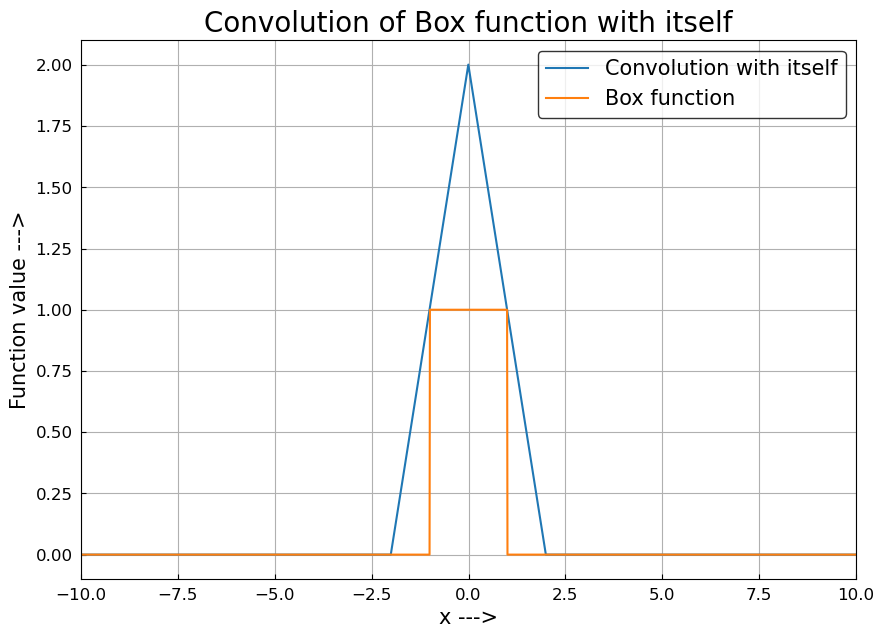

In [54]:
#Defining box function
def box(x):
    if (-1<x<1):
        return (1)
    else:
        return (0)

xi = -10                           #Initial value of x
xf = 10                            #Final value of x
N = 2000                           #Number of points
delx = (xf-xi)/(N-1)               #Defining delta(x)

#Creating arrays for x-values and the corresponding box function values
x,boxx =[],[]
for i in range(N):
    boxx.append(box(xi + (i*delx)))
    x.append(xi + (i*delx))

xi = x[0]
xf = x[-1]
for i in range(N):
    boxx.append(0)
    if (i<N/2):
        x.append(xi -(i*delx))
    else:
        x.append(i*delx)
x.sort()

#Defining unitary dft of the box function
dft = np.fft.fft(boxx,norm='ortho')

prod = []
for i in range(2*N):
    prod.append(dft[i]**2)

#Defining the convolution of box function with itself
conv = delx*(2*N)**0.5*np.fft.ifft(prod,norm='ortho')

#Shifting the box function to the centre, i.e., at x=0
shifted_boxx = np.zeros(2*N)
for k in range(N):
    shifted_boxx[int(N/2)+k] = boxx[k]

#Plotting the result
plt.plot(x,conv,label='Convolution with itself')
plt.plot(x,shifted_boxx,label='Box function')
plt.xlabel('x --->',rotation = 0, fontsize = 15 , labelpad = 4)  # Label for x-axis
plt.ylabel('Function value --->',rotation = 90, fontsize = 15 , labelpad = 4)  # Label for y-axis
plt.title('Convolution of Box function with itself',fontsize = 20)  # Title of the plot
plt.xlim(-10,10)
plt.rcParams['figure.figsize'] = [10,7]
plt.tick_params(axis="y",direction="in", pad=6)
plt.tick_params(axis="x",direction="in", pad=6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)  # Enable grid
plt.legend(edgecolor = 'black', fontsize=15)  # Show legend
plt.show()  # Show the plot

# Question:12

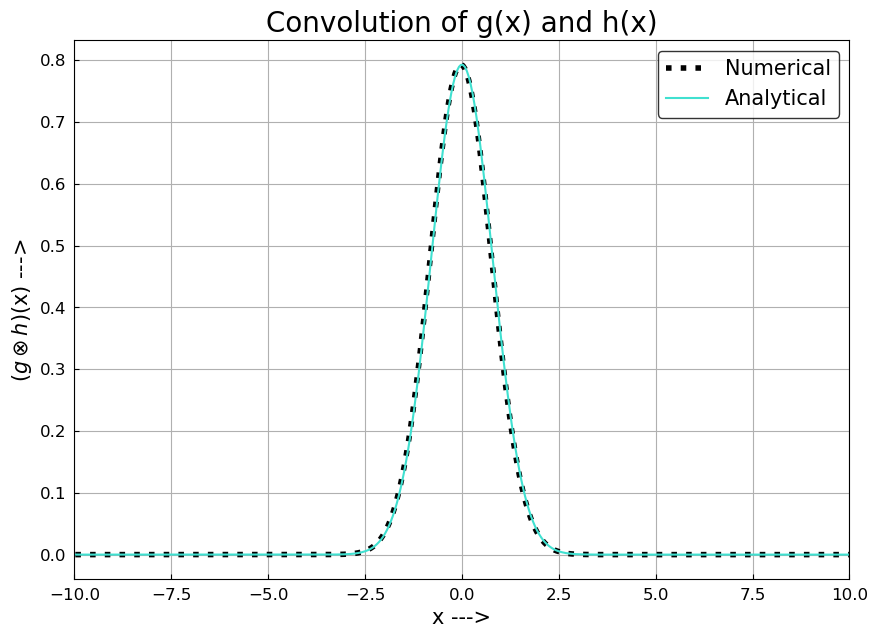

In [40]:
#Defining functions whose convolution is to be computed
def g(x):
    return np.exp(-x*x)
def h(x):
    return np.exp(-4*x*x)

#defining function for analytical convolution of h(x) and g(x)
def exact(x):
    return (((np.pi)/5)**0.5)*np.exp(-4*(x**2)/5)

xi = -5                           #Initial value of x
xf = 5                            #Final value of x
N = 200                           #Number of points
delx = (xf-xi)/(N-1)              #Defining delta(x)

#Defining arrays for x, g(x), h(x)
x,arr_g,arr_h =[],[],[]
for i in range(N):
    arr_g.append(g(xi + (i*delx)))
    arr_h.append(h(xi + (i*delx)))
    x.append(xi + (i*delx))

xi=x[0]
xf=x[-1]
for i in range(N):
    arr_g.append(0)
    arr_h.append(0)
    if (i<N/2):
        x.append(xi - (i*delx))
    else:
        x.append(i*delx)
x.sort()

#Obtaining unitary dft of f(x) and g(x)
dft_g = np.fft.fft(arr_g,norm='ortho')
dft_h = np.fft.fft(arr_h,norm='ortho')

prod = []
for i in range(2*N):
    prod.append(dft_g[i]*dft_h[i])

#Defining the convolution of f(x) and g(x)
convfg = delx*(2*N)**0.5*np.fft.ifft(prod,norm='ortho')

#Generating data for plotting analytical convolution
exact_arr = []
for i in range(len(x)):
    exact_arr.append(exact(x[i]))

#Plotting the Numerical vs Analytical result
plt.plot(x,convfg,label='Numerical',linestyle=':',color='black', linewidth=4)
plt.plot(x,exact_arr,label='Analytical',color='turquoise')
plt.xlabel('x --->',rotation = 0, fontsize = 15 , labelpad = 4)  # Label for x-axis
plt.ylabel(r'$(g\otimes h)$(x) --->',rotation = 90, fontsize = 15 , labelpad = 4)  # Label for y-axis
plt.title('Convolution of g(x) and h(x)',fontsize = 20)  # Title of the plot
plt.xlim(-10,10)
plt.rcParams['figure.figsize'] = [10,7]
plt.tick_params(axis="y",direction="in", pad=6)
plt.tick_params(axis="x",direction="in", pad=6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)  # Enable grid
plt.legend(edgecolor = 'black', fontsize=15)  # Show legend
plt.show()  # Show the plot

# Question:13

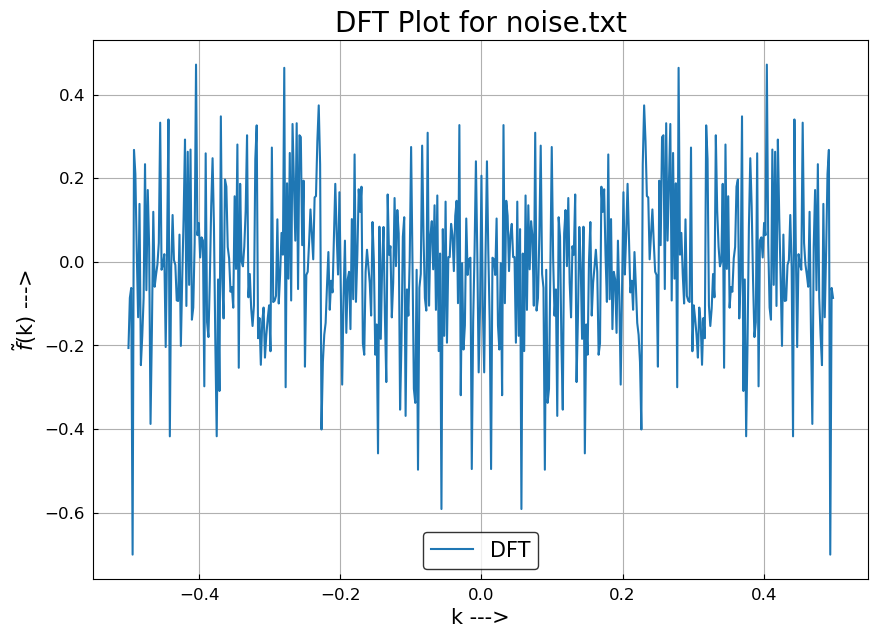

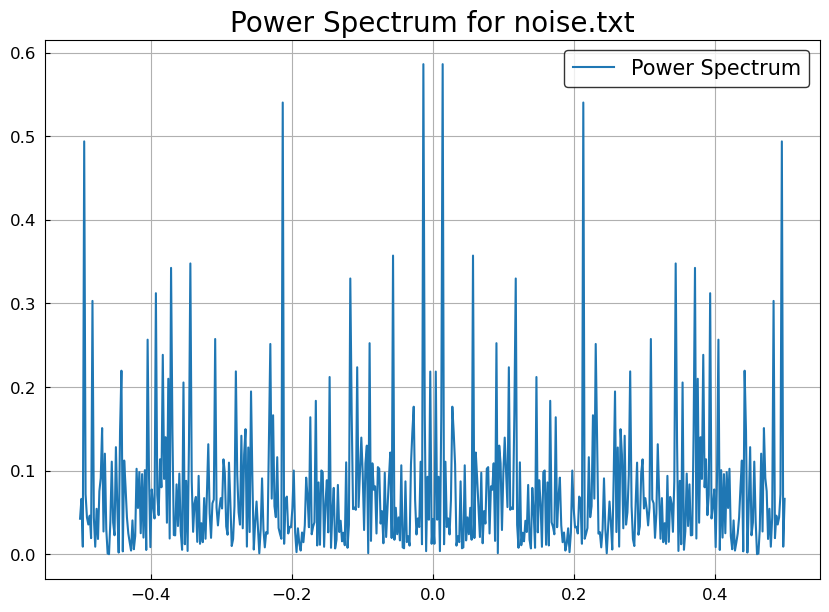

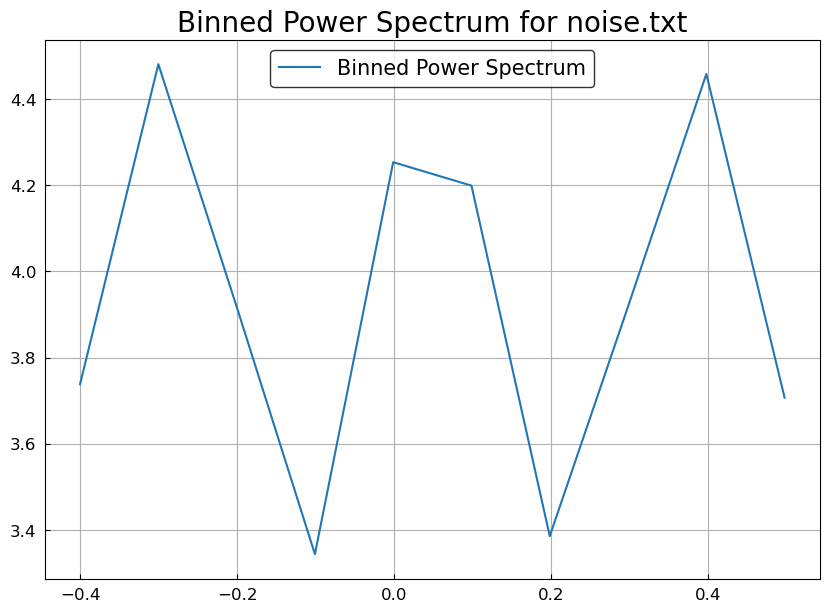

In [8]:
#Reading the noise.txt file
with open('noise.txt') as file:
    fp = file.readlines()
    fp = [float(item.rstrip()) for item in fp]

N = len(fp)                                           #Number of entries
x = [i for i in range(N)]                             #Array from 0 to N-1

#Computing the unitary dft
dft = np.fft.fft(fp, norm = 'ortho')
k = np.fft.fftfreq(N)                                 #dft sample frequencies              

#Sorting the 2-D k-dft array
dft_sorted = []
for i in range(N):
    dft_sorted.append([k[i],dft[i]])
dft_sorted.sort(key=lambda x:x[0])

#Final k-dft arrays
kf,dftf = [],[]
for i in range(N):
    kf.append(dft_sorted[i][0])
    dftf.append(dft_sorted[i][1])

#Plotting the dft
plt.figure(0)
plt.plot(kf,dftf,label='DFT')
plt.xlabel('k --->',rotation = 0, fontsize = 15 , labelpad = 4)  # Label for x-axis
plt.ylabel(r'$\tilde{f}$(k) --->',rotation = 90, fontsize = 15 , labelpad = 4)  # Label for y-axis
plt.title('DFT Plot for noise.txt',fontsize = 20)  # Title of the plot
plt.rcParams['figure.figsize'] = [10,7]
plt.tick_params(axis="y",direction="in", pad=6)
plt.tick_params(axis="x",direction="in", pad=6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)  # Enable grid
plt.legend(edgecolor = 'black', fontsize=15)  # Show legend
plt.show()  # Show the plot


#Obtaining the power spectrum
period = [np.abs(x)**2 for x in dftf]

#Plotting the power spectrum
plt.figure(1)
plt.plot(kf,period,label='Power Spectrum')
plt.xlabel('',rotation = 0, fontsize = 15 , labelpad = 4)  # Label for x-axis
plt.ylabel('',rotation = 90, fontsize = 15 , labelpad = 4)  # Label for y-axis
plt.title('Power Spectrum for noise.txt',fontsize = 20)  # Title of the plot
plt.rcParams['figure.figsize'] = [10,7]
plt.tick_params(axis="y",direction="in", pad=6)
plt.tick_params(axis="x",direction="in", pad=6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)  # Enable grid
plt.legend(edgecolor = 'black', fontsize=15)  # Show legend
plt.show()  # Show the plot

#Binning the power spectrum
kmin,kmax = kf[0],kf[-1]
bin = 10
delta = (kmax-kmin)/bin
k_bin,per_bin = [],[]
d = delta
n = 0
for i in range(1,bin+1):
    dftb = 0
    while(kf[n]<kf[0]+i*d):
        dftb = dftb + period[n]
        n = n+1
        if(n==len(kf)):
            break
    per_bin.append(dftb)
    k_bin.append(kf[0]+i*d)

#Plotting the binned power spectrum
plt.figure(2)
plt.plot(k_bin,per_bin,label='Binned Power Spectrum')
plt.xlabel('',rotation = 0, fontsize = 15 , labelpad = 4)  # Label for x-axis
plt.ylabel('',rotation = 90, fontsize = 15 , labelpad = 4)  # Label for y-axis
plt.title('Binned Power Spectrum for noise.txt',fontsize = 20)  # Title of the plot
plt.rcParams['figure.figsize'] = [10,7]
plt.tick_params(axis="y",direction="in", pad=6)
plt.tick_params(axis="x",direction="in", pad=6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)  # Enable grid
plt.legend(edgecolor = 'black', fontsize=15)  # Show legend
plt.show()  # Show the plot